In [7]:
print("IMDb-Review-Sentiment-Analysis")

IMDb-Review-Sentiment-Analysis


In [8]:
import pandas as pd
import os
print("done")

done


In [9]:
#------------------------------------------------------------------------------
# LOADING THE DATASET

# IMDb veri setini yüklemek için fonksiyon
def load_imdb_data(data_dir):
    data = {"review": [], "sentiment": []}
    for sentiment in ["pos", "neg"]:
        sentiment_dir = os.path.join(data_dir, sentiment)
        for filename in os.listdir(sentiment_dir):
            with open(os.path.join(sentiment_dir, filename), "r", encoding="utf-8") as file:
                data["review"].append(file.read())
                data["sentiment"].append(1 if sentiment == "pos" else 0)
    return pd.DataFrame(data)

data_dir = r"C:\Users\bused\OneDrive\Masaüstü\data-mining\term-project\aclImdb\train"

# Veriyi yükle
df = load_imdb_data(data_dir)

print("...............................................")
# Veri çerçevesinin ilk 5 satırını görüntüle
print(df.head())

print("...............................................")
# Veri setindeki sentiment dağılımını kontrol et
print(df["sentiment"].value_counts())

...............................................
                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1
...............................................
sentiment
1    12500
0    12500
Name: count, dtype: int64


In [10]:
#------------------------------------------------------------------------------
# DATA PREPROCESSING - and Some Feature Extractions


# Elle oluşturulmuş İngilizce stopwords listesi
stop_words = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", 
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
}

# Basit kök bulma fonksiyonu (örnek: -ing, -ed gibi ekleri temizler)
def simple_stemmer(word):
    suffixes = ["ing", "ly", "ed", "ious", "ies", "ive", "ness", "es", "s", "ment"]
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[: -len(suffix)]
    return word

# Noktalama işaretlerini temizleme fonksiyonu
def remove_punctuation(text):
    clean_text = ""
    for char in text:
        if char.isalnum() or char.isspace():
            clean_text += char
    return clean_text

# Metni temizleme fonksiyonu
def preprocess_text(text):
    # 1. Küçük harfe çevir
    text = text.lower()
    # 2. Noktalama işaretlerini kaldır
    text = remove_punctuation(text)
    # 3. Split words
    words = text.split()
    # 4. Remove stopwords and "br"
    words = [word for word in words if word not in stop_words and word != "br"]
    # 5. Kelimeleri köklerine indir
    words = [simple_stemmer(word) for word in words]
    return " ".join(words)

# Veri setine uygula
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Calculate average word length for each review
df['avg_word_length'] = df['cleaned_review'].apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0
)

# Verify results
print("...............................................")
print("First 5 Reviews with Average Word Length:")
print(df[['cleaned_review', 'avg_word_length']].head())


...............................................
First 5 Reviews with Average Word Length:
                                      cleaned_review  avg_word_length
0  bromwell high cartoon comedy ran time program ...         5.652778
1  homeless houseless george carlin stat issue ye...         5.203791
2  brilliant overact lesley ann warren best drama...         5.400000
3  easi underrat film inn brook cannon sure flaw ...         5.163934
4  typical mel brook film much les slapstick mov ...         5.188679


In [11]:
#------------------------------------------------------------------------------
# FEATURE EXTRACTION

# Build vocabulary
def build_vocabulary(reviews):
    vocabulary = {}
    index = 0
    for review in reviews:
        for word in review.split():
            if word not in vocabulary:
                vocabulary[word] = index
                index += 1
    return vocabulary

# Convert a review into a BoW vector
def text_to_bow_vector(text, vocabulary):
    # Create a zero vector of vocabulary size
    vector = [0] * len(vocabulary)
    for word in text.split():
        if word in vocabulary:  # Ensure word exists in vocabulary
            index = vocabulary[word]
            vector[index] += 1
    return vector

# Apply Bag of Words to all reviews
def apply_bag_of_words(df, vocabulary):
    bow_vectors = []
    for review in df['cleaned_review']:
        vector = text_to_bow_vector(review, vocabulary)
        bow_vectors.append(vector)
    return bow_vectors


print("...............................................")
# Create vocabulary
print("Building vocabulary...")
vocabulary = build_vocabulary(df['cleaned_review'])

print("...............................................")
# Display vocabulary size
print(f"Vocabulary Size: {len(vocabulary)}")

print("...............................................")
print(list(vocabulary.items())[:10])  # Show the first 10 words and their indices

# Create BoW vectors
print("...............................................")
print("Creating Bag of Words vectors...")
bow_vectors = apply_bag_of_words(df, vocabulary)

print("...............................................")
# Display the first review's BoW vector
print("First Review BoW Vector:", bow_vectors[0][:50])  # Display first 50 elements for brevity

print("...............................................")
print("First Cleaned Review:", df['cleaned_review'][0])
print("...............................................")
print("First 10 Words in Vocabulary:", list(vocabulary.keys())[:10])


...............................................
Building vocabulary...
...............................................
Vocabulary Size: 100672
...............................................
[('bromwell', 0), ('high', 1), ('cartoon', 2), ('comedy', 3), ('ran', 4), ('time', 5), ('program', 6), ('school', 7), ('life', 8), ('teacher', 9)]
...............................................
Creating Bag of Words vectors...
...............................................
First Review BoW Vector: [4, 5, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
...............................................
First Cleaned Review: bromwell high cartoon comedy ran time program school life teacher 35 year teach profession lead believe bromwell high satire much closer reality teacher scramble surv financial insightful student see right pathetic teacher pomp petti whole situation remind school knew student saw episod

In [12]:
#------------------------------------------------------------------------------
# ANALYSIS - Sentiment Distribution


# Count the number of positive and negative sentiments
positive_count = len(df[df['sentiment'] == 1])
negative_count = len(df[df['sentiment'] == 0])


print("...............................................")
# Display counts
print("Positive Reviews:", positive_count)
print("Negative Reviews:", negative_count)

print("...............................................")
# Manually generate a bar chart
bar_chart = "Sentiment Distribution\n"
bar_chart += "Positive: " + "+" * (positive_count // 100) + f" ({positive_count})\n"
bar_chart += "Negative: " + "+" * (negative_count // 100) + f" ({negative_count})\n"

print(bar_chart)

...............................................
Positive Reviews: 12500
Negative Reviews: 12500
...............................................
Sentiment Distribution
Positive: +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ (12500)
Negative: +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ (12500)



In [13]:
#------------------------------------------------------------------------------
# ANALYSIS - Word Count Distribution

# Calculate word counts for each review
word_counts = [len(review.split()) for review in df['cleaned_review']]

print("...............................................")
# Display statistics
print("Average Word Count:", sum(word_counts) / len(word_counts))
print("Max Word Count:", max(word_counts))
print("Min Word Count:", min(word_counts))

print("...............................................")
# Manually generate a histogram
print("\nWord Count Distribution Histogram:")
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_counts = [sum(1 for wc in word_counts if bins[i] <= wc < bins[i + 1]) for i in range(len(bins) - 1)]

for i in range(len(bins) - 1):
    print(f"{bins[i]}-{bins[i + 1]}: " + "+" * (bin_counts[i] // 10) + f" ({bin_counts[i]})")


...............................................
Average Word Count: 121.8032
Max Word Count: 1439
Min Word Count: 4
...............................................

Word Count Distribution Histogram:
0-50: ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ (2741)
50-100: ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [17]:

#------------------------------------------------------------------------------
# ANALYSIS - Most Common Words

# Count word frequencies for positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 1]['cleaned_review'])
negative_reviews = " ".join(df[df['sentiment'] == 0]['cleaned_review'])

# Create frequency dictionaries
positive_word_freq = {}
for word in positive_reviews.split():
    positive_word_freq[word] = positive_word_freq.get(word, 0) + 1

negative_word_freq = {}
for word in negative_reviews.split():
    negative_word_freq[word] = negative_word_freq.get(word, 0) + 1


# Add word count feature
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))


print("...............................................")
# Verify that the column exists
print(df[['cleaned_review', 'word_count']].head())


# Get the top 10 words for each sentiment
top_positive_words = sorted(positive_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_negative_words = sorted(negative_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

print("...............................................")
print("\nTop 10 Words in Positive Reviews:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("...............................................")
print("\nTop 10 Words in Negative Reviews:")
for word, count in top_negative_words:
    print(f"{word}: {count}")


...............................................
                                      cleaned_review  word_count
0  bromwell high cartoon comedy ran time program ...          72
1  homeless houseless george carlin stat issue ye...         211
2  brilliant overact lesley ann warren best drama...          85
3  easi underrat film inn brook cannon sure flaw ...          61
4  typical mel brook film much les slapstick mov ...          53
...............................................

Top 10 Words in Positive Reviews:
film: 24399
movie: 18141
one: 13069
like: 8935
real: 7885
good: 7510
see: 6930
character: 6870
story: 6529
great: 6457
...............................................

Top 10 Words in Negative Reviews:
movie: 23669
film: 21905
one: 12440
like: 11136
real: 8297
even: 7701
bad: 7653
good: 7265
watch: 7238
character: 6936


In [18]:
#------------------------------------------------------------------------------
# CORRELATION - Calculate Correlations

# Features to analyze
features = ['word_count', 'avg_word_length', 'sentiment']

# Calculate pairwise correlations manually
correlations = {}
for i, feature1 in enumerate(features):
    for feature2 in features[i:]:
        # Calculate correlation coefficient
        values1 = df[feature1]
        values2 = df[feature2]
        mean1, mean2 = sum(values1) / len(values1), sum(values2) / len(values2)
        numerator = sum((x - mean1) * (y - mean2) for x, y in zip(values1, values2))
        denominator = (
            (sum((x - mean1) ** 2 for x in values1) ** 0.5) *
            (sum((y - mean2) ** 2 for y in values2) ** 0.5)
        )
        correlation = numerator / denominator if denominator != 0 else 0
        correlations[(feature1, feature2)] = correlation

# Display correlation results
print("...............................................")
print("Pairwise Correlations:")
for pair, value in correlations.items():
    print(f"{pair}: {value:.3f}")


...............................................
Pairwise Correlations:
('word_count', 'word_count'): 1.000
('word_count', 'avg_word_length'): 0.141
('word_count', 'sentiment'): 0.022
('avg_word_length', 'avg_word_length'): 1.000
('avg_word_length', 'sentiment'): 0.123
('sentiment', 'sentiment'): 1.000


In [34]:
#------------------------------------------------------------------------------
# CORRELATION - Visualize Correlations

print("...............................................")
# Visualize the correlation matrix
print("\nCorrelation Matrix:")
matrix = {feature: [] for feature in features}
for feature1 in features:
    for feature2 in features:
        matrix[feature1].append(correlations.get((feature1, feature2), correlations.get((feature2, feature1), 0)))

# Print a properly formatted correlation matrix
print(f"{'':<15}", end="")
for feature in features:
    print(f"  {feature:<15}", end="")
print()
for i, feature1 in enumerate(features):
    print(f"{feature1:<15}      ", end="")
    for feature2 in features:
        value = correlations.get((feature1, feature2), correlations.get((feature2, feature1), 0))
        print(f"{value:<15.3f}", end="")
    print()



...............................................

Correlation Matrix:
                 word_count       avg_word_length  sentiment      
word_count           1.000          0.141          0.022          
avg_word_length      0.141          1.000          0.123          
sentiment            0.022          0.123          1.000          


In [35]:
#------------------------------------------------------------------------------
# SPLIT THE DATA

# Manual Train-Test Split
def train_test_split(df, test_size=0.2):
    split_index = int(len(df) * (1 - test_size))
    train_df = df[:split_index]
    test_df = df[split_index:]
    return train_df, test_df

# Shuffle data before splitting
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Perform train-test split
train_df, test_df = train_test_split(df)

print("...............................................")
# Verify splits
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))


...............................................
Train set size: 20000
Test set size: 5000


In [36]:
import math

In [42]:
#------------------------------------------------------------------------------
# TRAIN A CLASSIFIER


# Sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Logistic Regression Training
def train_logistic_regression(train_df, learning_rate=0.01, epochs=100):
    # Initialize weights and bias
    vocabulary_size = len(vocabulary)
    weights = [0] * vocabulary_size  # One weight for each word in the vocabulary
    bias = 0
    
    # Train using gradient descent
    for epoch in range(epochs):
        total_loss = 0
        for _, row in train_df.iterrows():
            # Convert cleaned review to BoW vector
            bow_vector = text_to_bow_vector(row['cleaned_review'], vocabulary)
            
            # Compute linear combination (z)
            z = sum(w * x for w, x in zip(weights, bow_vector)) + bias
            
            # Apply sigmoid
            y_pred = sigmoid(z)
            
            # Clip predictions to avoid math domain errors
            y_pred = max(min(y_pred, 1 - 1e-15), 1e-15)
            
            # Compute loss (binary cross-entropy)
            y_true = row['sentiment']
            total_loss += -y_true * math.log(y_pred) - (1 - y_true) * math.log(1 - y_pred)
            
            # Compute gradients
            dz = y_pred - y_true
            dw = [dz * x for x in bow_vector]
            db = dz
            
            # Update weights and bias
            weights = [w - learning_rate * dw_i for w, dw_i in zip(weights, dw)]
            bias -= learning_rate * db
        
        # Print loss for each epoch
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_df):.4f}")
    
    return weights, bias


# Train the model
#train_df = train_df.sample(frac=0.1, random_state=42)  # Use only 10% of the training data
#weights, bias = train_logistic_regression(train_df)
# Train the model with fewer epochs
weights, bias = train_logistic_regression(train_df, learning_rate=0.01, epochs=10)

print("...............................................")
# Model training complete
print("Training complete.")


Epoch 1/10, Loss: 0.4964
Epoch 2/10, Loss: 0.2896
Epoch 3/10, Loss: 0.2181
Epoch 4/10, Loss: 0.1790
Epoch 5/10, Loss: 0.1527
Epoch 6/10, Loss: 0.1335
Epoch 7/10, Loss: 0.1188
Epoch 8/10, Loss: 0.1072
Epoch 9/10, Loss: 0.0976
Epoch 10/10, Loss: 0.0897
...............................................
Training complete.


In [44]:
#------------------------------------------------------------------------------
# EVALUATE THE MODEL

# Logistic Regression Prediction
def predict_logistic_regression(review, weights, bias):
    bow_vector = text_to_bow_vector(review, vocabulary)
    z = sum(w * x for w, x in zip(weights, bow_vector)) + bias
    return 1 if sigmoid(z) >= 0.5 else 0

# Function to calculate precision, recall, and F1-score
def calculate_metrics(y_true, y_pred):
    # Initialize counts
    true_positive = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    false_positive = sum((yt == 0 and yp == 1) for yt, yp in zip(y_true, y_pred))
    false_negative = sum((yt == 1 and yp == 0) for yt, yp in zip(y_true, y_pred))
    true_negative = sum((yt == 0 and yp == 0) for yt, yp in zip(y_true, y_pred))

    # Precision: TP / (TP + FP)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    # Recall: TP / (TP + FN)
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    
    # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Return metrics
    return precision, recall, f1_score

print("...............................................")
# Evaluate the model
def evaluate_model(test_df, weights, bias):
    correct = 0
    total = len(test_df)
    y_true = []
    y_pred = []
    
    for _, row in test_df.iterrows():
        prediction = predict_logistic_regression(row['cleaned_review'], weights, bias)
        y_true.append(row['sentiment'])
        y_pred.append(prediction)
        if prediction == row['sentiment']:
            correct += 1
    
    # Calculate accuracy
    accuracy = correct / total

    # Calculate detailed metrics
    precision, recall, f1_score = calculate_metrics(y_true, y_pred)
    
    # Display results
    print("Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    
    return y_true, y_pred

# Evaluate the trained model
y_true, y_pred = evaluate_model(test_df, weights, bias)


...............................................
Model Evaluation:
Accuracy: 0.8304
Precision: 0.8399
Recall: 0.8099
F1-Score: 0.8246


In [45]:
#------------------------------------------------------------------------------
# PARAMETER TUNING

# Experiment with different learning rates and epochs
def parameter_tuning(train_df, test_df, learning_rates, epoch_values):
    results = []
    
    for lr in learning_rates:
        for epochs in epoch_values:
            print("...............................................")
            print(f"Training with learning_rate={lr}, epochs={epochs}...")
            
            # Train the model
            weights, bias = train_logistic_regression(train_df, learning_rate=lr, epochs=epochs)
            
            # Evaluate the model
            y_true, y_pred = evaluate_model(test_df, weights, bias)
            
            # Calculate metrics
            precision, recall, f1_score = calculate_metrics(y_true, y_pred)
            accuracy = sum(yt == yp for yt, yp in zip(y_true, y_pred)) / len(y_true)
            
            # Store results
            results.append({
                "learning_rate": lr,
                "epochs": epochs,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1_score": f1_score
            })
    
    return results

# Define parameter values to test
learning_rates = [0.001, 0.01, 0.1]
epoch_values = [5, 10, 20]

# Run parameter tuning
results = parameter_tuning(train_df, test_df, learning_rates, epoch_values)

print("...............................................")
# Display results
for result in results:
    print(f"Learning Rate: {result['learning_rate']}, Epochs: {result['epochs']}")
    print(f"Accuracy: {result['accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1-Score: {result['f1_score']:.4f}")
    


Training with learning_rate=0.001, epochs=5...
Epoch 1/5, Loss: 0.6243
Epoch 2/5, Loss: 0.5229
Epoch 3/5, Loss: 0.4666
Epoch 4/5, Loss: 0.4280
Epoch 5/5, Loss: 0.3987
Model Evaluation:
Accuracy: 0.8198
Precision: 0.8177
Recall: 0.8160
F1-Score: 0.8168
Training with learning_rate=0.001, epochs=10...
Epoch 1/10, Loss: 0.6243
Epoch 2/10, Loss: 0.5229
Epoch 3/10, Loss: 0.4666
Epoch 4/10, Loss: 0.4280
Epoch 5/10, Loss: 0.3987
Epoch 6/10, Loss: 0.3753
Epoch 7/10, Loss: 0.3558
Epoch 8/10, Loss: 0.3391
Epoch 9/10, Loss: 0.3246
Epoch 10/10, Loss: 0.3118
Model Evaluation:
Accuracy: 0.8268
Precision: 0.8205
Recall: 0.8298
F1-Score: 0.8251
Training with learning_rate=0.001, epochs=20...
Epoch 1/20, Loss: 0.6243
Epoch 2/20, Loss: 0.5229
Epoch 3/20, Loss: 0.4666
Epoch 4/20, Loss: 0.4280
Epoch 5/20, Loss: 0.3987
Epoch 6/20, Loss: 0.3753
Epoch 7/20, Loss: 0.3558
Epoch 8/20, Loss: 0.3391
Epoch 9/20, Loss: 0.3246
Epoch 10/20, Loss: 0.3118
Epoch 11/20, Loss: 0.3003
Epoch 12/20, Loss: 0.2899
Epoch 13/20, 

In [46]:
import matplotlib.pyplot as plt

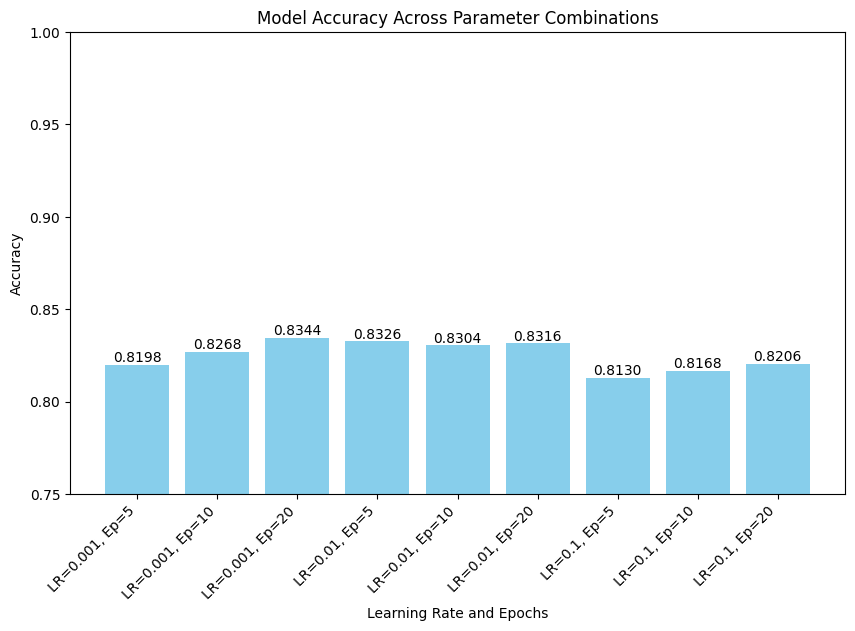

In [51]:
#------------------------------------------------------------------------------
# VISUALIZE RESULTS -  Accuracy Bar Chart


def plot_accuracy_with_values(results):
    labels = [f"LR={r['learning_rate']}, Ep={r['epochs']}" for r in results]
    accuracies = [r['accuracy'] for r in results]
    
    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, accuracies, color='skyblue')
    plt.ylim(0.75, 1)  # Adjust y-axis range
    
    # Add text labels
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{acc:.4f}",
                 ha='center', va='bottom', fontsize=10)
    
    plt.title("Model Accuracy Across Parameter Combinations")
    plt.xlabel("Learning Rate and Epochs")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Call the function
plot_accuracy_with_values(results)



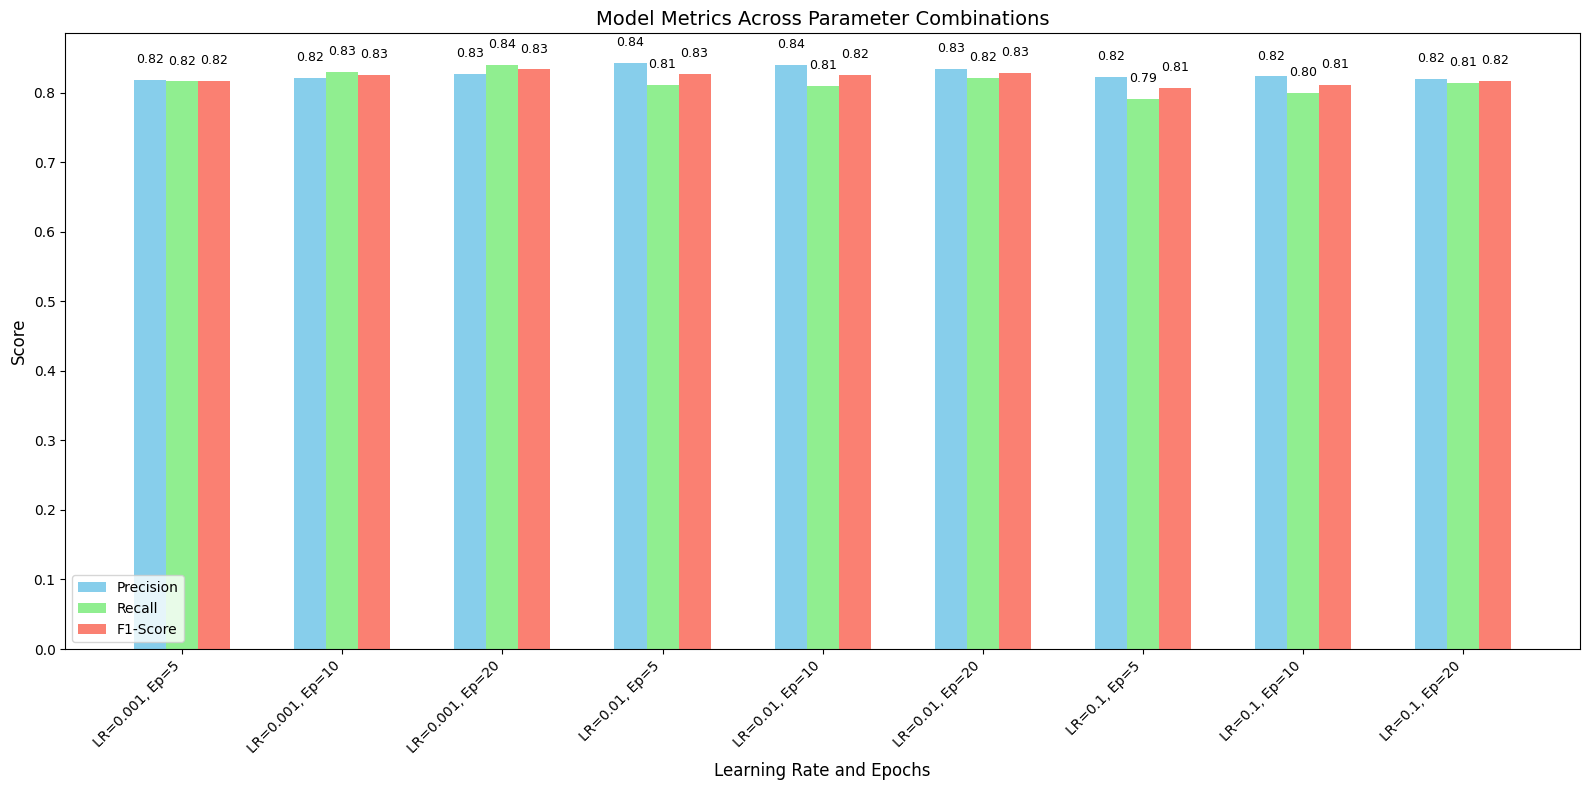

In [81]:
#------------------------------------------------------------------------------
# VISUALIZE RESULTS -  Detailed Metrics


# Create a grouped bar chart for metrics with fixed spacing and label positions
def plot_metrics_with_fixed_spacing(results):
    labels = [f"LR={r['learning_rate']}, Ep={r['epochs']}" for r in results]
    precision = [r['precision'] for r in results]
    recall = [r['recall'] for r in results]
    f1_score = [r['f1_score'] for r in results]
    
    x = range(len(labels))
    bar_width = 0.2  # Reduce bar width for more spacing
    
    # Plot
    plt.figure(figsize=(16, 8))  # Increase figure size for clarity
    bars_precision = plt.bar([i - bar_width for i in x], precision, width=bar_width, label="Precision", color='skyblue')
    bars_recall = plt.bar(x, recall, width=bar_width, label="Recall", color='lightgreen')
    bars_f1 = plt.bar([i + bar_width for i in x], f1_score, width=bar_width, label="F1-Score", color='salmon')
    
    # Add text labels with precise offsets
    for i, (prec, rec, f1) in enumerate(zip(precision, recall, f1_score)):
        plt.text(i - bar_width, prec + 0.02, f"{prec:.2f}", ha='center', va='bottom', fontsize=9)
        plt.text(i, rec + 0.02, f"{rec:.2f}", ha='center', va='bottom', fontsize=9)
        plt.text(i + bar_width, f1 + 0.02, f"{f1:.2f}", ha='center', va='bottom', fontsize=9)
    
    plt.title("Model Metrics Across Parameter Combinations", fontsize=14)
    plt.xlabel("Learning Rate and Epochs", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(x, labels, rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=10)
    plt.tight_layout()  # Ensure everything fits nicely
    plt.show()

# Call the function
plot_metrics_with_fixed_spacing(results)


Model Evaluation:
Accuracy: 0.8304
Precision: 0.8399
Recall: 0.8099
F1-Score: 0.8246


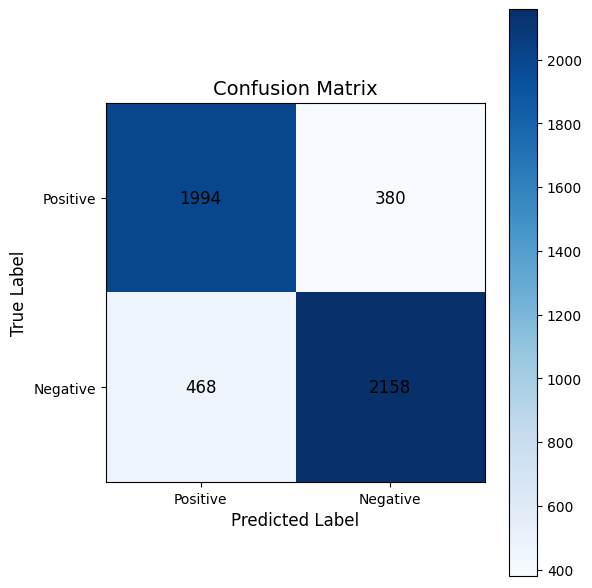

In [84]:
#------------------------------------------------------------------------------
# VISUALIZE RESULTS -  Confusion Matrix


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
    tn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0)
    fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
    fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)
    return [[tp, fp], [fn, tn]]

# Function to visualize the confusion matrix
def plot_confusion_matrix(cm):
    labels = ["Positive", "Negative"]
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix", fontsize=14)
    plt.colorbar()

    # Add labels to the axes
    plt.xticks(ticks=[0, 1], labels=labels)
    plt.yticks(ticks=[0, 1], labels=labels)

    # Add text annotations
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color="black", fontsize=12)

    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.tight_layout()
    plt.show()

# Generate true and predicted labels
y_true, y_pred = evaluate_model(test_df, weights, bias)

# Calculate confusion matrix
confusion_matrix = calculate_confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix)


In [85]:
print("finished!")

finished!
